In [1]:
import os
os.chdir('G:\\freecloud\\ThinkpadC_space\\Desktop\\资料\\资料\\量化投资：以Python为工具\\Python Quant Book\\part 5\\028')

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
Vanke=pd.read_csv('Vanke.csv')
Vanke.index=Vanke.iloc[:,1]
Vanke.index=pd.to_datetime(Vanke.index, format='%Y-%m-%d')
Vanke=Vanke.iloc[:,2:]
Vanke.head(2)

,Open,High,Low,Close,Volume
Date,,,,,
2014-01-01,8.03,8.03,8.03,8.03,0
2014-01-02,7.99,8.07,7.92,7.99,48529900


In [4]:
Close=Vanke.Close
Close.describe()

count    344.000000
mean       9.846337
std        2.268338
min        6.570000
25%        7.987500
50%        9.250000
75%       11.967500
max       14.910000
Name: Close, dtype: float64

In [5]:
lag5Close=Close.shift(5)

In [6]:
momentum5=Close-lag5Close
momentum5.tail()

Date
2015-04-22    0.98
2015-04-23    0.46
2015-04-24   -0.25
2015-04-27    0.49
2015-04-28   -0.29
Name: Close, dtype: float64

# plot

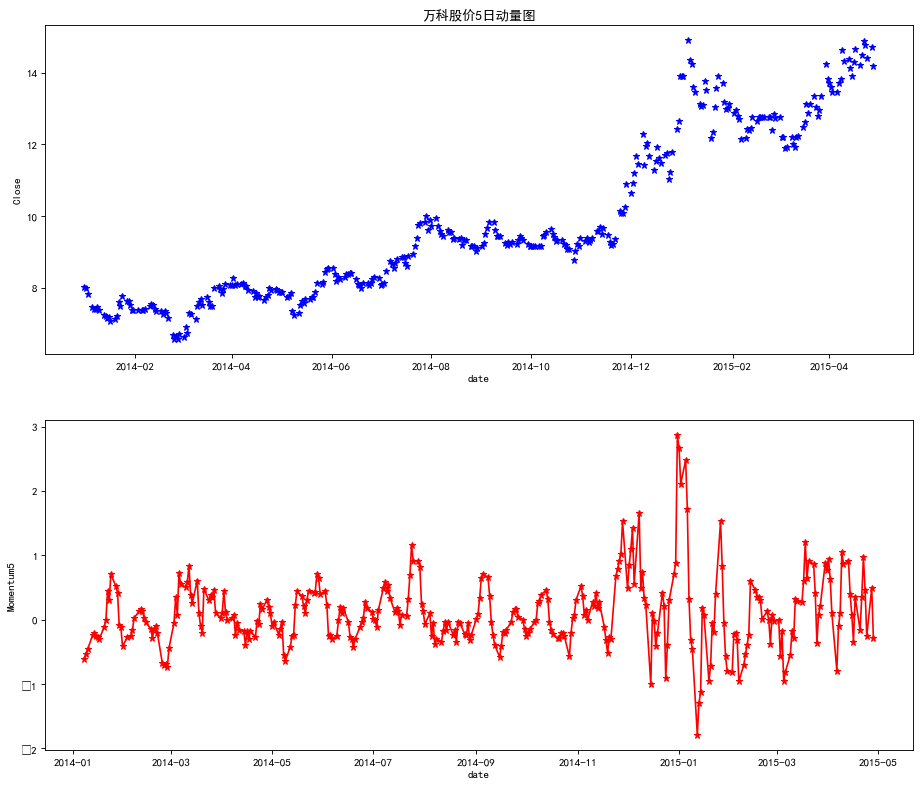

In [17]:
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.figure(figsize=(14,12),dpi=80)
plt.subplot(211)
plt.plot(Close,'b*')
plt.xlabel('date')
plt.ylabel('Close')
plt.title('万科股价5日动量图')
plt.subplot(212)
plt.plot(momentum5,'r-*')
plt.xlabel('date')
plt.ylabel('Momentum5')
plt.show()

# divide

In [18]:

Momen5=Close/lag5Close-1
Momen5=Momen5.dropna();
Momen5[0:5]

Date
2014-01-08   -0.075965
2014-01-09   -0.066333
2014-01-10   -0.058673
2014-01-13   -0.032086
2014-01-14   -0.026918
Name: Close, dtype: float64

# momentum function

In [19]:

def momentum(price,periond):
    lagPrice=price.shift(periond)
    momen=price-lagPrice
    momen= momen.dropna()
    return(momen)

In [20]:
momentum(Close,5).tail(n=5)

Date
2015-04-22    0.98
2015-04-23    0.46
2015-04-24   -0.25
2015-04-27    0.49
2015-04-28   -0.29
Name: Close, dtype: float64

In [21]:
momen35=momentum(Close,35)

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter, WeekdayLocator, \
                                DayLocator, MONDAY, date2num
from matplotlib.finance import candlestick_ohlc

plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

E:\Data_analysis_plan\python_36_install\lib\site-packages\matplotlib\cbook\deprecation.py:106: MatplotlibDeprecationWarning: The finance module has been deprecated in mpl 2.0 and will be removed in mpl 2.2. Please use the module mpl_finance instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


# 定义 candleLinePlots 函数

In [24]:

def candleLinePlots(candleData, candleTitle='a', **kwargs):
    Date = [date2num(date) for date in candleData.index]
    candleData.loc[:,'Date'] = Date
    listData = []
    
    for i in range(len(candleData)):
        a = [candleData.Date[i],\
            candleData.Open[i],candleData.High[i],\
            candleData.Low[i],candleData.Close[i]]
        listData.append(a)
    # 如 果 不 定 长 参 数 无 取 值 ， 只 画 蜡 烛 图
    ax = plt.subplot()
    
    # 如 果 不 定 长 参 数 有 值 ， 则 分 成 两 个 子 图
    flag=0
    if kwargs:
        if kwargs['splitFigures']:
            ax = plt.subplot(211)
            ax2= plt.subplot(212)
            flag=1;
        # 如 果 无 参 数 splitFigures ， 则 只 画 一 个 图 形 框
        # 如 果 有 参 数 splitFigures ， 则 画 出 两 个 图 形 框
        
        for key in kwargs:
            if key=='title':
                ax2.set_title(kwargs[key])
            if key=='ylabel':
                ax2.set_ylabel(kwargs[key])
            if key=='grid':
                ax2.grid(kwargs[key])
            if key=='Data':
                plt.sca(ax)
                if flag:
                    plt.sca(ax2)
                    
                #一维数据
                if kwargs[key].ndim==1:
                    plt.plot(kwargs[key],\
                             color='k',\
                             label=kwargs[key].name)
                    plt.legend(loc='best')
                #二维数据有两个columns
                elif all([kwargs[key].ndim==2,\
                          len(kwargs[key].columns)==2]):
                    plt.plot(kwargs[key].iloc[:,0], color='k', 
                             label=kwargs[key].iloc[:,0].name)
                    plt.plot(kwargs[key].iloc[:,1],\
                             linestyle='dashed',\
                             label=kwargs[key].iloc[:,1].name)
                    plt.legend(loc='best')
    
    mondays = WeekdayLocator(MONDAY)
    weekFormatter = DateFormatter('%y %b %d')
    ax.xaxis.set_major_locator(mondays)
    ax.xaxis.set_minor_locator(DayLocator())
    ax.xaxis.set_major_formatter(weekFormatter)
    plt.sca(ax)
    
    candlestick_ohlc(ax,listData, width=0.7,\
                     colorup='r',colordown='g')
    ax.set_title(candleTitle)
    plt.setp(ax.get_xticklabels(),\
             rotation=20,\
             horizontalalignment='center')
    ax.autoscale_view()
    
    return(plt.show())

# Candle 模组是本书自己编的模组，里面有绘制K线函数Candleplot

E:\Data_analysis_plan\python_36_install\lib\site-packages\pandas\core\indexing.py:337: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
E:\Data_analysis_plan\python_36_install\lib\site-packages\pandas\core\indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


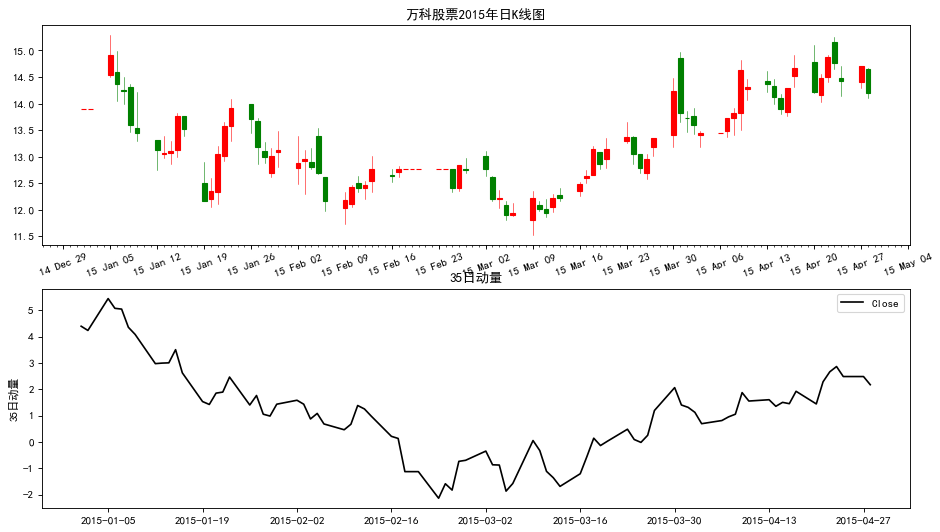

In [27]:

import candle
Vanke15=Vanke['2015']
plt.figure(figsize=(14,8),dpi=80)
candle.candleLinePlots(Vanke['2015'],\
               candleTitle='万科股票2015年日K线图',\
               splitFigures=True,Data=momen35['2015'],\
               title='35日动量',ylabel='35日动量')

# 使用上面定义的函数

E:\Data_analysis_plan\python_36_install\lib\site-packages\pandas\core\indexing.py:337: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
E:\Data_analysis_plan\python_36_install\lib\site-packages\pandas\core\indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


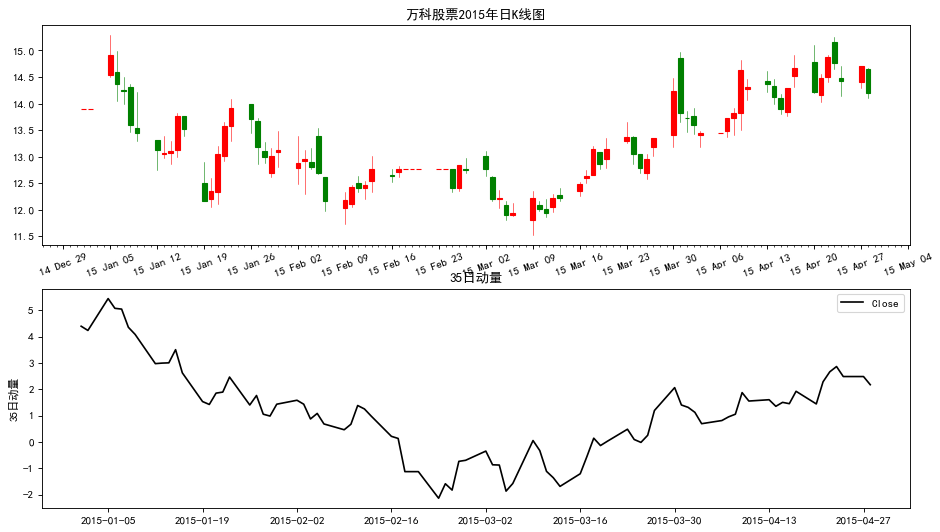

In [28]:

plt.figure(figsize=(14,8),dpi=80)
candleLinePlots(Vanke['2015'],\
               candleTitle='万科股票2015年日K线图',\
               splitFigures=True,Data=momen35['2015'],\
               title='35日动量',ylabel='35日动量')

In [29]:
Close=Vanke.Close
momen35=momentum(Close,35)
momen35.head()
signal=[]
for i in momen35:
    if i>0:
        signal.append(1)
    else:
        signal.append(-1)

signal=pd.Series(signal,index=momen35.index)
signal.head()

Date
2014-02-20   -1
2014-02-21   -1
2014-02-24   -1
2014-02-25   -1
2014-02-26   -1
dtype: int64

In [30]:
tradeSig = signal.shift(1)
ret=Close/Close.shift(1)-1
# ret=ret['2014-02-20':]
# ret.head(n=3)
Mom35Ret=ret*(signal.shift(1))
Mom35Ret[0:5]

Date
2014-01-01   NaN
2014-01-02   NaN
2014-01-03   NaN
2014-01-06   NaN
2014-01-07   NaN
dtype: float64

In [31]:
real_Mom35Ret=Mom35Ret[Mom35Ret!=0]
real_ret=ret[ret!=0]

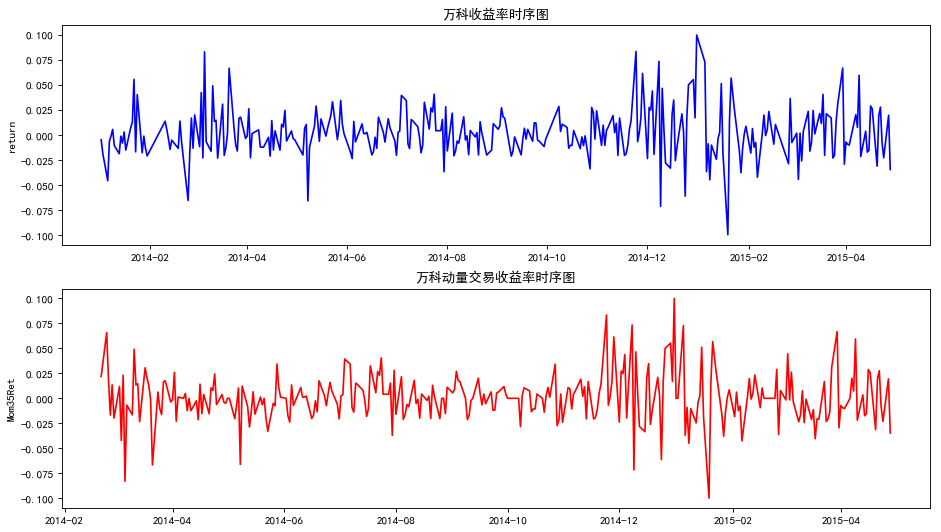

In [35]:
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False
plt.figure(figsize=(14,8),dpi=80)
plt.subplot(2,1,1)
plt.plot(real_ret,'b')
plt.ylabel('return')
plt.title('万科收益率时序图')

plt.subplot(2,1,2)
plt.plot(Mom35Ret,'r')
plt.ylabel('Mom35Ret')
plt.title('万科动量交易收益率时序图')

plt.show()

In [36]:
win=Mom35Ret[Mom35Ret>0]
winrate=len(win)/len(Mom35Ret)
winrate

0.43023255813953487

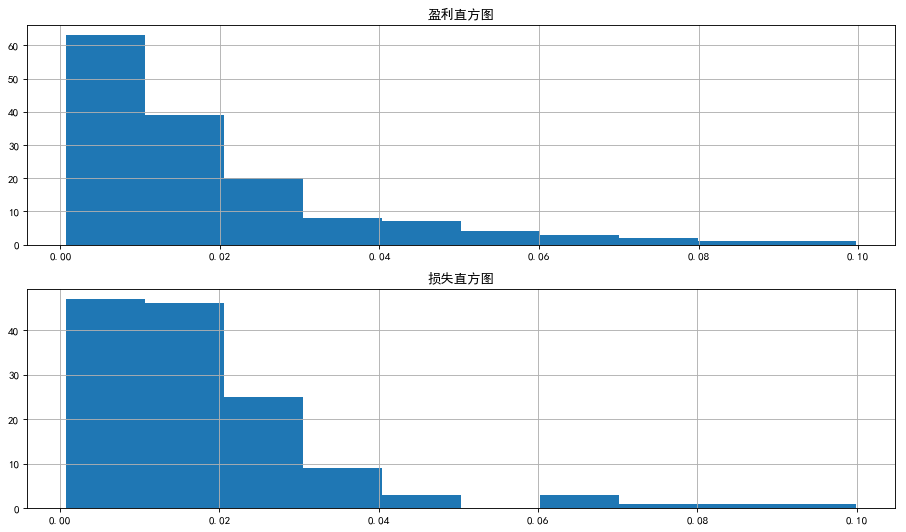

In [40]:
loss=-Mom35Ret[Mom35Ret<0]
plt.figure(figsize=(14,8),dpi=80)
plt.subplot(2,1,1)
win.hist()
plt.title("盈利直方图")

plt.subplot(2,1,2)
loss.hist()
plt.title("损失直方图")

plt.show()

In [41]:
performance=pd.DataFrame({"win":win.describe(),\
"loss":loss.describe()})
performance

,loss,win
count,136.000000,148.000000
mean,0.018514,0.018646
std,0.015860,0.018261
min,0.000805,0.000769
25%,0.008214,0.005472
50%,0.015996,0.013444
75%,0.022360,0.024786
max,0.099852,0.099684


In [1]:
import pandas as pd
import numpy as np
import os
os.chdir('G:\\freecloud\\ThinkpadC_space\\Desktop\\资料\\资料\量化投资：以Python为工具\\PythonANS')

# 1.获取浦发银行2014年度日交易数据
# ①使用2种不同的方法计算6、30、90日动量值

In [43]:
pufa = pd.read_csv('Data/Part5/002/problem28-1.csv',
                index_col='date')

In [44]:
pufa.index.name='Date'
pufa.index = pd.to_datetime(pufa.index,format='%Y-%m-%d')

In [45]:
mom6_1 = pufa.Close - pufa.Close.shift(6)
mom6_2 = (pufa.Close - pufa.Close.shift(6))/pufa.Close.shift(6)

In [46]:
mom30_1 = pufa.Close - pufa.Close.shift(30)
mom30_2 = (pufa.Close - pufa.Close.shift(30))/pufa.Close.shift(30)

In [47]:
mom90_1 = pufa.Close - pufa.Close.shift(90)
mom90_2 = (pufa.Close - pufa.Close.shift(90))/pufa.Close.shift(90)

# ②实现以下交易策略：
# (1)若当期动量值大于0，市场上涨趋势大，signal为1，第2期买入股票
# (2)若当期动量值小于0，市场下跌趋势明显，signal为-1，卖出股票(动量值的选取为6、30、90日动量值，分别使用上述动量值执行交易策略，并比较买卖点预测准确值)

In [48]:
def getSignal(x):
    signal = np.where(x>0,1,np.where(x<0,-1,0))
    return(signal)

In [49]:
signal6 = getSignal(mom6_2)
signal30 = getSignal(mom30_2)
signal90 = getSignal(mom90_2)

In [50]:
ret = (pufa.Close-pufa.Close.shift(1))/pufa.Close.shift(1)
ret6 = ret[6:]
ret30 = ret[30:]
ret90 = ret[90:]

In [51]:
signal6 = pd.Series(signal6[6:],index=ret6.index)
Mom6Ret = ret6[1:] * signal6.shift(1)[1:]

In [52]:
signal30 = pd.Series(signal6[30:],index=ret30.index)
Mom30Ret = ret30[1:] * signal30.shift(1)[1:]

In [53]:
signal90 = pd.Series(signal6[90:],index=ret90.index)
Mom90Ret = ret90[1:] * signal90.shift(1)[1:]

In [54]:
winrate6 = sum(Mom6Ret>0)/sum(Mom6Ret!=0)
winrate6

0.44642857142857145

In [55]:
winrate30 = sum(Mom30Ret>0)/sum(Mom30Ret!=0)
winrate30

0.44390243902439025

In [56]:
winrate90 = sum(Mom90Ret>0)/sum(Mom90Ret!=0)
winrate90

0.44966442953020136

# 2.使用信号延迟释放理论，对上题中的策略加以改正
# (1)若6日和90日动量值都大于0，说明市场在长短期都具有上升趋势，释放买入信号，signal为1；在买入点上，设置一定的时间间隔，释放信号后在第3期买入(信号出现为第1期)
# (2)若6日和90日动量值都小于0，说明市场在长短期都具有下跌趋势，释放卖出信号，signal为-1；在卖出点上，设置一定的时间间隔，释放信号后在第3期卖出(信号出现为第1期)

In [57]:
def getSignal(x):
    first = x.iloc[:,0]
    second = x.iloc[:,1]
    signal = [1 if first[i]>0 and second[i]>0 else -1 if first[i]<0 and second[i]<0 else 0 for i in range(len(first))]
    return(signal)

In [58]:
momen = pd.concat([mom6_2,mom90_2],1)
momen = momen.dropna()

In [59]:
signal = getSignal(momen)
signal = pd.Series(signal,index= mom90_2.dropna().index)

In [60]:
MomRet = ret90[2:] * signal.shift(2)[2:]

In [61]:
sum(MomRet>0)/sum(MomRet!=0)

0.45000000000000001

# 3.选出5支银行股票，作为轮动投资标的，
# ①获取5支银行股票3个月的收益率，并用以衡量“动量”概念

In [2]:
import pandas as pd
import numpy as np

In [3]:
prices = pd.read_csv('Data/Part5/002/problem28-3.csv',
                index_col='date')                
prices.index.name='Date'
prices.index = pd.to_datetime(prices.index,format='%Y-%m-%d')

In [4]:
prices = prices.asfreq('M',how='end',method='ffill')
ret_pf = (prices.pfyh - prices.pfyh.shift(3))/prices.pfyh.shift(3)
ret_zg = (prices.zgyh - prices.zgyh.shift(3))/prices.zgyh.shift(3)
ret_ms = (prices.msyh - prices.msyh.shift(3))/prices.msyh.shift(3)
ret_gs = (prices.gsyh - prices.gsyh.shift(3))/prices.gsyh.shift(3)
ret_js = (prices.jsyh - prices.jsyh.shift(3))/prices.jsyh.shift(3)

# ②运用动量指标选股与轮动投资策略：自开始日起，每一期选出收益率最大的股票，下一期买入100手该股票，进行轮动投资，即每期持有的股票为前一期3个月动量值最大的股票，到3个月结束日时计算该策略的平均收益率大小

In [5]:
cash = np.ones(len(ret_pf))*1000000
stock = np.zeros(len(ret_pf))

In [6]:
for i in range(4,len(cash)):
    momen = pd.Series([ret_gs[i-1],ret_js[i-1],ret_ms[i-1],ret_pf[i-1],ret_zg[i-1]])
    if i!=4:
        momen_lag = pd.Series([ret_gs[i-2],ret_js[i-2],ret_ms[i-2],ret_pf[i-2],ret_zg[i-2]])
        cash[i] = cash[i-1] + 10000 * prices.iloc[:,momen_lag.idxmax()][i]
    stock[i] = 10000 * prices.iloc[:,momen.idxmax()][i]
    cash[i] -= 10000 * prices.iloc[:,momen.idxmax()][i]

In [69]:
print("该策略的平均收益率为：%s"%((cash[35]+stock[35]-1000000)/1000000*len(cash)))

该策略的平均收益率为：0.072
